In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722I4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/18 17:19:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
from pyspark.sql.functions import lit
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

In [3]:
#To read the datasets
df1 = spark.read.csv('Dataset/TFT_Challenger_MatchData.csv', inferSchema=True, header=True)
df1.printSchema()

df2 = spark.read.csv('Dataset/TFT_Diamond_MatchData.csv', inferSchema=True, header=True)
df2.printSchema()

df3 = spark.read.csv('Dataset/TFT_GrandMaster_MatchData.csv', inferSchema=True, header=True)
df3.printSchema()

df4 = spark.read.csv('Dataset/TFT_Master_MatchData.csv', inferSchema=True, header=True)
df4.printSchema()

df5 = spark.read.csv('Dataset/TFT_Platinum_MatchData .csv', inferSchema=True, header=True)
df5.printSchema()

root
 |-- gameId: string (nullable = true)
 |-- gameDuration: double (nullable = true)
 |-- level: integer (nullable = true)
 |-- lastRound: integer (nullable = true)
 |-- Ranked: integer (nullable = true)
 |-- ingameDuration: double (nullable = true)
 |-- combination: string (nullable = true)
 |-- champion: string (nullable = true)



root
 |-- gameId: string (nullable = true)
 |-- gameDuration: double (nullable = true)
 |-- level: integer (nullable = true)
 |-- lastRound: integer (nullable = true)
 |-- Ranked: integer (nullable = true)
 |-- ingameDuration: double (nullable = true)
 |-- combination: string (nullable = true)
 |-- champion: string (nullable = true)



root
 |-- gameId: string (nullable = true)
 |-- gameDuration: double (nullable = true)
 |-- level: integer (nullable = true)
 |-- lastRound: integer (nullable = true)
 |-- Ranked: integer (nullable = true)
 |-- ingameDuration: double (nullable = true)
 |-- combination: string (nullable = true)
 |-- champion: string (nullable = true)

root
 |-- gameId: string (nullable = true)
 |-- gameDuration: double (nullable = true)
 |-- level: integer (nullable = true)
 |-- lastRound: integer (nullable = true)
 |-- Ranked: integer (nullable = true)
 |-- ingameDuration: double (nullable = true)
 |-- combination: string (nullable = true)
 |-- champion: string (nullable = true)

root
 |-- gameId: string (nullable = true)
 |-- gameDuration: double (nullable = true)
 |-- level: integer (nullable = true)
 |-- lastRound: integer (nullable = true)
 |-- Ranked: integer (nullable = true)
 |-- ingameDuration: double (nullable = true)
 |-- combination: string (nullable = true)
 |-- champion: string (nullable =

In [4]:
df1.show()
df2.show()
df3.show()
df4.show()
df5.show()

+-------------+------------+-----+---------+------+--------------+--------------------+--------------------+
|       gameId|gameDuration|level|lastRound|Ranked|ingameDuration|         combination|            champion|
+-------------+------------+-----+---------+------+--------------+--------------------+--------------------+
|KR_4247538593| 2142.470703|    8|       35|     1|   2134.272217|   "{""DarkStar"": 2|    ""Protector"": 4|
|KR_4247538593| 2142.470703|    9|       35|     2|   2134.272217|    "{""Blaster"": 2|    ""Mercenary"": 1|
|KR_4247538593| 2142.470703|    8|       34|     3|   2073.459229| "{""Cybernetic"": 1|     ""DarkStar"": 3|
|KR_4247538593| 2142.470703|    8|       33|     4|   1998.146729|    "{""Blaster"": 1|   ""Cybernetic"": 1|
|KR_4247538593| 2142.470703|    9|       33|     5|   1986.443237|    "{""Blaster"": 2| ""Demolitionist"...|
|KR_4247538593| 2142.470703|    8|       31|     6|   1878.470093|    "{""Blaster"": 2| ""Demolitionist"...|
|KR_4247538593| 214

+-------------+------------+-----+---------+------+--------------+-------------------+--------------------+
|       gameId|gameDuration|level|lastRound|Ranked|ingameDuration|        combination|            champion|
+-------------+------------+-----+---------+------+--------------+-------------------+--------------------+
|KR_4291707834| 1963.905273|    6|       27|     5|   1390.165771|"{""Cybernetic"": 1| ""Demolitionist"...|
|KR_4291707834| 1963.905273|    8|       37|     3|   1891.282715|   "{""Blaster"": 1|       ""Chrono"": 1|
|KR_4291707834| 1963.905273|    6|       25|     7|    1279.46106|   "{""Blaster"": 1|   ""Cybernetic"": 1|
|KR_4291707834| 1963.905273|    7|       38|     2|   1955.608521|  "{""DarkStar"": 1|    ""Protector"": 2|
|KR_4291707834| 1963.905273|    8|       38|     1|   1955.608521|   "{""Blaster"": 1|       ""Chrono"": 5|
|KR_4291707834| 1963.905273|    5|       21|     8|   1067.354736|     "{""Rebel"": 1|  ""Blademaster"": 1|
|KR_4291707834| 1963.905273|

In [5]:
df1.describe().show()
df2.describe().show()
df3.describe().show()
df4.describe().show()
df5.describe().show()

+-------+-------------+------------------+------------------+-----------------+------------------+------------------+--------------------+-------------------+
|summary|       gameId|      gameDuration|             level|        lastRound|            Ranked|    ingameDuration|         combination|           champion|
+-------+-------------+------------------+------------------+-----------------+------------------+------------------+--------------------+-------------------+
|  count|        79999|             79999|             79999|            79999|             79999|             79999|               79999|              79999|
|   mean|         null|2159.3728157595074| 7.892923661545769|33.75158439480494| 4.499981249765622|1885.0097235465043|                null|               null|
| stddev|         null| 150.7232473421276|0.7644929118672823|4.764065529197064|2.2913103515732214|266.91765173026215|                null|               null|
|    min|KR_4247538593|       38.88844681|    

+-------+-------------+------------------+------------------+-----------------+----------------+------------------+------------------+----------------+
|summary|       gameId|      gameDuration|             level|        lastRound|          Ranked|    ingameDuration|       combination|        champion|
+-------+-------------+------------------+------------------+-----------------+----------------+------------------+------------------+----------------+
|  count|        80000|             80000|             80000|            80000|           80000|             80000|             80000|           80000|
|   mean|         null|2156.6076191979505|          7.855675|           33.569|             4.5|1873.9154541819405|              null|            null|
| stddev|         null| 137.2064978797223|0.7883863670740971|4.798054477242271|2.29130216816122| 267.0393253362198|              null|            null|
|    min|KR_3965402291|       123.8556595|                 2|                3|         

+-------+-------------+------------------+------------------+-----------------+------------------+------------------+--------------------+-------------------+
|summary|       gameId|      gameDuration|             level|        lastRound|            Ranked|    ingameDuration|         combination|           champion|
+-------+-------------+------------------+------------------+-----------------+------------------+------------------+--------------------+-------------------+
|  count|        80000|             80000|             80000|            80000|             80000|             80000|               80000|              80000|
|   mean|         null|2154.3420347043893|          7.895225|          33.5867|           4.49965|1875.5377141319316|                null|               null|
| stddev|         null|136.15483538719837|0.7588177626610797|4.790017736227484|2.2916076280242677|265.43442938756374|                null|               null|
|    min|KR_4254769102|       125.2782974|    

+-------+-------------+------------------+------------------+-----------------+-----------------+------------------+--------------------+-------------------+
|summary|       gameId|      gameDuration|             level|        lastRound|           Ranked|    ingameDuration|         combination|           champion|
+-------+-------------+------------------+------------------+-----------------+-----------------+------------------+--------------------+-------------------+
|  count|        79999|             79999|             79999|            79999|            79999|             79999|               79999|              79999|
|   mean|         null|2155.4974718968865| 7.841323016537706|33.53115663945799|4.499331241640521|1876.4673318726973|                null|               null|
| stddev|         null| 133.8433517735869|0.7711593848349675|4.784822202970548|2.291910283821469| 267.1070520698545|                null|               null|
|    min|KR_4242528808|       181.1088409|          

+-------+-------------+-----------------+------------------+-----------------+------------------+------------------+------------------+----------------+
|summary|       gameId|     gameDuration|             level|        lastRound|            Ranked|    ingameDuration|       combination|        champion|
+-------+-------------+-----------------+------------------+-----------------+------------------+------------------+------------------+----------------+
|  count|        80000|            80000|             80000|            80000|             80000|             80000|             80000|           80000|
|   mean|         null|2168.427078831173|         7.7856375|       33.1931125|          4.496375| 1881.922943518933|              null|            null|
| stddev|         null|156.2946954617307|0.8281876552319833|4.878633781673756|2.2942542697809647|279.21325665105053|              null|            null|
|    min|KR_3890408252|              0.0|                 1|                0|    

In [6]:
#To add new attribute 'segment'
df1 = df1.withColumn('segment', lit('Challenger'))
df2 = df2.withColumn('segment', lit('Diamond'))
df3 = df3.withColumn('segment', lit('GrandMaster'))
df4 = df4.withColumn('segment', lit('Master'))
df5 = df5.withColumn('segment', lit('Platinum'))

In [7]:
df1.show()
df2.show()
df3.show()
df4.show()
df5.show()

+-------------+------------+-----+---------+------+--------------+--------------------+--------------------+----------+
|       gameId|gameDuration|level|lastRound|Ranked|ingameDuration|         combination|            champion|   segment|
+-------------+------------+-----+---------+------+--------------+--------------------+--------------------+----------+
|KR_4247538593| 2142.470703|    8|       35|     1|   2134.272217|   "{""DarkStar"": 2|    ""Protector"": 4|Challenger|
|KR_4247538593| 2142.470703|    9|       35|     2|   2134.272217|    "{""Blaster"": 2|    ""Mercenary"": 1|Challenger|
|KR_4247538593| 2142.470703|    8|       34|     3|   2073.459229| "{""Cybernetic"": 1|     ""DarkStar"": 3|Challenger|
|KR_4247538593| 2142.470703|    8|       33|     4|   1998.146729|    "{""Blaster"": 1|   ""Cybernetic"": 1|Challenger|
|KR_4247538593| 2142.470703|    9|       33|     5|   1986.443237|    "{""Blaster"": 2| ""Demolitionist"...|Challenger|
|KR_4247538593| 2142.470703|    8|      

+-------------+------------+-----+---------+------+--------------+-------------------+--------------------+-------+
|       gameId|gameDuration|level|lastRound|Ranked|ingameDuration|        combination|            champion|segment|
+-------------+------------+-----+---------+------+--------------+-------------------+--------------------+-------+
|KR_4242528808| 2233.449951|    8|       37|     1|   2225.243408|  "{""DarkStar"": 2|    ""Protector"": 4| Master|
|KR_4242528808| 2233.449951|    9|       37|     2|   2225.243408|   "{""Blaster"": 2|       ""Chrono"": 1| Master|
|KR_4242528808| 2233.449951|    8|       35|     3|   2138.763428|   "{""Blaster"": 3|       ""Chrono"": 2| Master|
|KR_4242528808| 2233.449951|    8|       33|     4|   2003.865967|    "{""Chrono"": 2|   ""Cybernetic"": 2| Master|
|KR_4242528808| 2233.449951|    7|       31|     5|   1885.395386|   "{""Blaster"": 1|     ""DarkStar"": 1| Master|
|KR_4242528808| 2233.449951|    9|       31|     6|   1876.700928|   "{"

In [8]:
#To combine five tables
combined_df = df1.unionAll(df2)
combined_df = combined_df.unionAll(df3)
combined_df = combined_df.unionAll(df4)
combined_df = combined_df.unionAll(df5)

In [9]:
combined_df.describe().show()

+-------+-------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+----------------+----------+
|summary|       gameId|      gameDuration|             level|        lastRound|           Ranked|   ingameDuration|       combination|        champion|   segment|
+-------+-------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+----------------+----------+
|  count|       399998|            399998|            399998|           399998|           399998|           399998|            399998|          399998|    399998|
|   mean|         null| 2158.849411149318| 7.854156770783854|33.52631013155066|4.499067495337477|1878.570622610876|              null|            null|      null|
| stddev|         null|143.21375509037216|0.7836338203892028|4.806737439872818|2.292066160082213|269.2215033988559|              null|            null|      null|
|    min|KR_3890408252

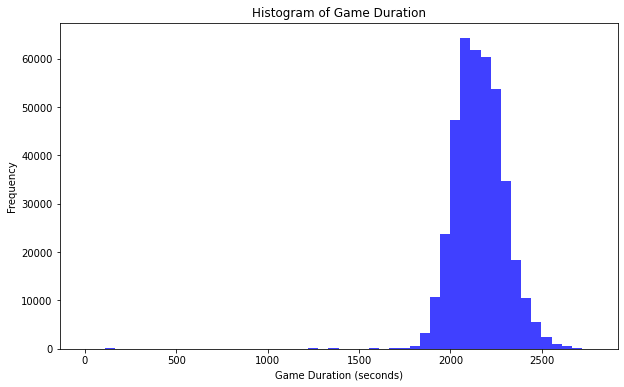

In [10]:
#To create the histogram of ‘gameDuration’
game_durations = combined_df.select('gameDuration').rdd.flatMap(lambda x: x).collect()
plt.figure(figsize=(10, 6))
plt.hist(game_durations, bins=50, alpha=0.75, color='blue')
plt.title('Histogram of Game Duration')
plt.xlabel('Game Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [11]:
# To replave the missing value of 'gameDuration' with 0
combined_df = combined_df.fillna({'gameDuration': 0})

# To filter out 'gameDuration' greater than or equal to 1200
combined_df = combined_df.filter(col('gameDuration') > 1200)

In [12]:
combined_df.describe().show()

+-------+-------------+-----------------+------------------+-----------------+-----------------+----------------+------------------+----------------+----------+
|summary|       gameId|     gameDuration|             level|        lastRound|           Ranked|  ingameDuration|       combination|        champion|   segment|
+-------+-------------+-----------------+------------------+-----------------+-----------------+----------------+------------------+----------------+----------+
|  count|       399606|           399606|            399606|           399606|           399606|          399606|            399606|          399606|    399606|
|   mean|         null|2160.405670060339|7.8578599920922105| 33.5488781449728|4.499924926052161|1879.91352491335|              null|            null|      null|
| stddev|         null|133.9105814435457|0.7735742082823188|4.751337711645592|2.291364979312444|265.740385548894|              null|            null|      null|
|    min|KR_3965402291|      1210.

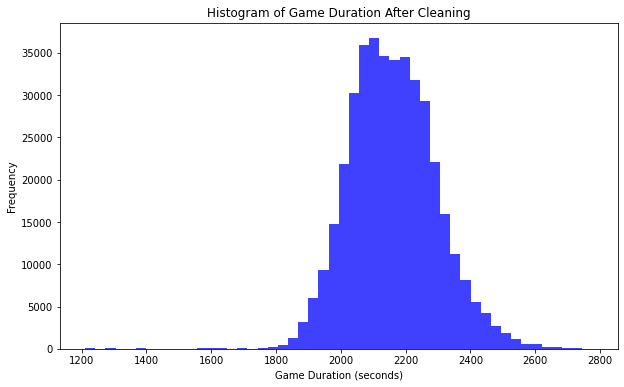

In [13]:
#To create the histogram of ‘gameDuration’ after cleaning
game_durations_filtered = combined_df.select('gameDuration').rdd.flatMap(lambda x: x).collect()
plt.figure(figsize=(10, 6))
plt.hist(game_durations_filtered, bins=50, alpha=0.75, color='blue')
plt.title('Histogram of Game Duration After Cleaning')
plt.xlabel('Game Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [21]:
from pyspark.sql.functions import col, from_json, to_json, size
from pyspark.sql.types import MapType, StringType, IntegerType

# 定义 JSON 的 schema
schema = MapType(StringType(), IntegerType())

# 使用 from_json 解析 JSON 字符串
combined_df = combined_df.withColumn('parsed_combination', from_json(col('combination'), schema))
combined_df.select('parsed_combination').show(truncate=False)

+------------------+
|parsed_combination|
+------------------+
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
|null              |
+------------------+
only showing top 20 rows



In [22]:
combined_df.printSchema()

root
 |-- gameId: string (nullable = true)
 |-- gameDuration: double (nullable = false)
 |-- level: integer (nullable = true)
 |-- lastRound: integer (nullable = true)
 |-- Ranked: integer (nullable = true)
 |-- ingameDuration: double (nullable = true)
 |-- combination: string (nullable = true)
 |-- champion: string (nullable = true)
 |-- segment: string (nullable = false)
 |-- parsed_combination: map (nullable = true)
 |    |-- key: string
 |    |-- value: integer (valueContainsNull = true)

